In [4]:
import numpy as np
from numpy import loadtxt
import pandas as pd

import os
for dirname, _, filenames in os.walk('./archive/images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./archive/images\maksssksksss0.png
./archive/images\maksssksksss1.png
./archive/images\maksssksksss10.png
./archive/images\maksssksksss100.png
./archive/images\maksssksksss101.png
./archive/images\maksssksksss102.png
./archive/images\maksssksksss103.png
./archive/images\maksssksksss104.png
./archive/images\maksssksksss105.png
./archive/images\maksssksksss106.png
./archive/images\maksssksksss107.png
./archive/images\maksssksksss108.png
./archive/images\maksssksksss109.png
./archive/images\maksssksksss11.png
./archive/images\maksssksksss110.png
./archive/images\maksssksksss111.png
./archive/images\maksssksksss112.png
./archive/images\maksssksksss113.png
./archive/images\maksssksksss114.png
./archive/images\maksssksksss115.png
./archive/images\maksssksksss116.png
./archive/images\maksssksksss117.png
./archive/images\maksssksksss118.png
./archive/images\maksssksksss119.png
./archive/images\maksssksksss12.png
./archive/images\maksssksksss120.png
./archive/images\maksssksksss121.png
./archiv

In [5]:
import os
import xml.etree.ElementTree as et
import re
import pandas as pd

dic = {"image": [],"Dimensions": []}
for i in range(1,116):
	dic[f'Object {i}']=[]
print("Generating data in CSV format....")

for file in os.listdir("./archive/annotations"):
    row = []
    xml = et.parse("./archive/annotations/"+file) 
    root = xml.getroot()
    img = root[1].text
    row.append(img)
    h,w = root[2][0].text,root[2][1].text
    row.append([h,w])

    for i in range(4,len(root)):
        temp = []
        temp.append(root[i][0].text)
        for point in root[i][5]:
            temp.append(point.text)
        row.append(temp)
    for i in range(len(row),119):
        row.append(0)
    for i,each in enumerate(dic):
        dic[each].append(row[i])
df = pd.DataFrame(dic)
print("Done!")

Generating data in CSV format....
Done!


In [6]:
df.head()

,image,Dimensions,Object 1,Object 2,Object 3,Object 4,Object 5,Object 6,Object 7,Object 8,...,Object 106,Object 107,Object 108,Object 109,Object 110,Object 111,Object 112,Object 113,Object 114,Object 115
0,maksssksksss0.png,"[512, 366]","[without_mask, 79, 105, 109, 142]","[with_mask, 185, 100, 226, 144]","[without_mask, 325, 90, 360, 141]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,maksssksksss1.png,"[400, 156]","[with_mask, 321, 34, 354, 69]","[with_mask, 224, 38, 261, 73]","[with_mask, 299, 58, 315, 81]","[with_mask, 143, 74, 174, 115]","[with_mask, 74, 69, 95, 99]","[with_mask, 191, 67, 221, 93]","[with_mask, 21, 73, 44, 93]","[with_mask, 369, 70, 398, 99]",...,0,0,0,0,0,0,0,0,0,0
2,maksssksksss10.png,"[301, 400]","[with_mask, 98, 267, 194, 383]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,maksssksksss100.png,"[400, 226]","[with_mask, 189, 30, 245, 88]","[with_mask, 387, 54, 400, 75]","[with_mask, 118, 87, 163, 126]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,maksssksksss101.png,"[301, 400]","[with_mask, 48, 294, 164, 400]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Extracting each data into respective label folders....
Done!


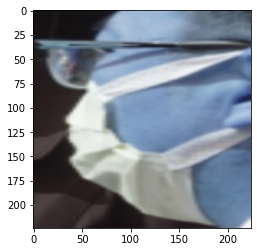

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pandas as pd
import glob
import os
import cv2
import random as rand

image_directories = sorted(glob.glob(os.path.join("./archive/images","*.png")))
j=0
classes = ["without_mask","mask_weared_incorrect","with_mask"]
labels = []
data = []

print("Extracting each data into respective label folders....")
for idx,image in enumerate(image_directories):
    img  = cv2.imread(image)
    #scale to dimension
    X,Y = df["Dimensions"][idx]
    img=cv2.resize(img,(int(X),int(Y)))
    #find the face in each object
    for obj in df.columns[3:]:
        info = df[obj][idx]
        if info!=0:
            label = info[0]
            info[0] = info[0].replace(str(label), str(classes.index(label)))
            info=[int(each) for each in info]
            face = img[info[2]:info[4],info[1]:info[3]]
            if((info[3]-info[1])>40 and (info[4]-info[2])>40):
                try:
                    face = cv2.resize(face, (224, 224))
                    data.append(face.ravel())
                    labels.append(label)
                    plt.imshow(face)
                except:
                    pass
print("Done!")

In [8]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

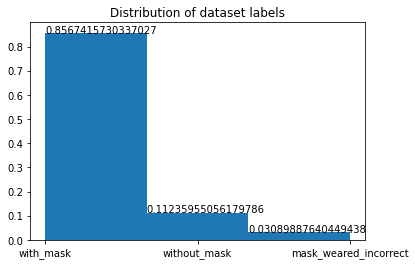

In [9]:
le = LabelEncoder()
le = le.fit(classes)
label_data = le.transform(labels)
weights = np.ones_like(label_data)/len(label_data)
histogram_data = plt.hist(labels,bins=3,weights=weights);
for i in range(3):
    plt.text(histogram_data[1][i],histogram_data[0][i],str(histogram_data[0][i]));
plt.title("Distribution of dataset labels");

In [10]:
print(data[0].ravel())
print(label_data)

[37. 33. 32. ... 62. 58. 70.]
[1 1 1 1 1 1 1 2 1 1 1 2 0 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 0 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 0 2 1
 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1]


In [11]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca_unit = RandomizedPCA(n_components=70, whiten=True, random_state=42)
svc_unit = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca_unit, svc_unit)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label_data,
                                                random_state=42)
from sklearn.model_selection import GridSearchCV
hyperparam_tryout_table = {'svc__C': [1,2, 5, 10,20, 50], 'svc__gamma': [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005]}
%time hyperparam_grid = GridSearchCV(model, hyperparam_tryout_table)

hyperparam_grid.fit(x_train, y_train)
print(hyperparam_grid.best_params_)



Wall time: 0 ns
{'svc__C': 20, 'svc__gamma': 0.005}


In [12]:
model = hyperparam_grid.best_estimator_
y_fit = model.predict(x_test)
test_err_count = np.shape(np.nonzero(np.array(y_test) - np.array(y_fit)))[1]
test_acc = 1 - test_err_count/np.shape(y_test)[0]
print(test_acc)

0.898876404494382


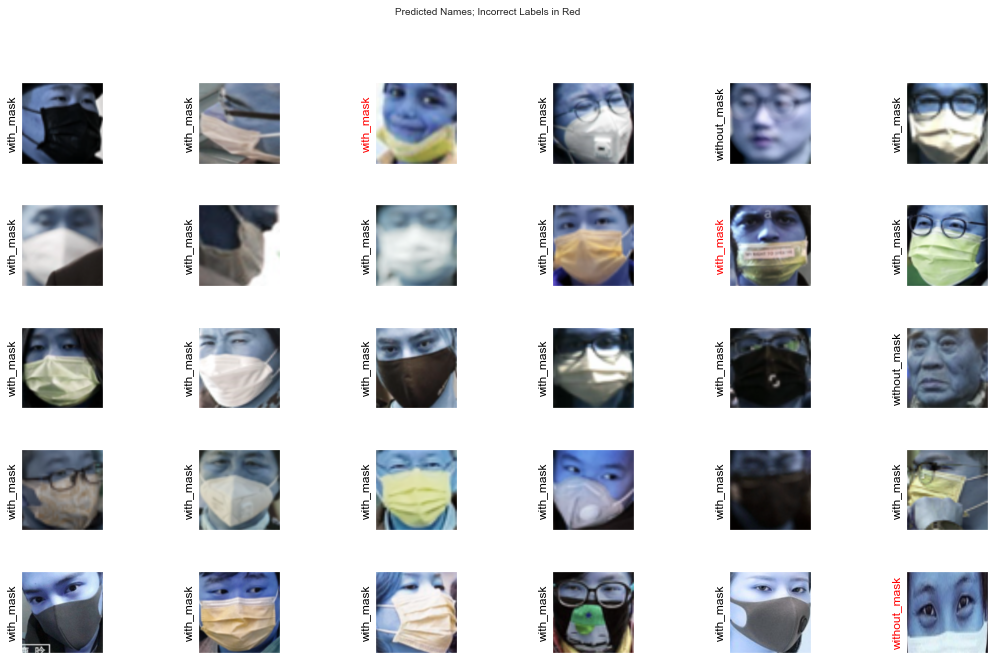

In [13]:
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
target_names_list = ["mask_weared_incorrect","with_mask","without_mask"]
fig, ax = plt.subplots(5, 6)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(224,224,3).astype('uint8'))
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(target_names_list[y_fit[i]].split()[-1],
                   color='black' if y_fit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=10);
fig.set_size_inches(18.5, 10.5, forward=True)

In [14]:
target_names_list = ["mask_weared_incorrect","with_mask","without_mask"]
from sklearn.metrics import classification_report
print(classification_report(y_test, y_fit,
                            target_names=target_names_list,zero_division=0))

                       precision    recall  f1-score   support

mask_weared_incorrect       0.00      0.00      0.00         2
            with_mask       0.93      0.96      0.94        79
         without_mask       0.57      0.50      0.53         8

             accuracy                           0.90        89
            macro avg       0.50      0.49      0.49        89
         weighted avg       0.87      0.90      0.89        89



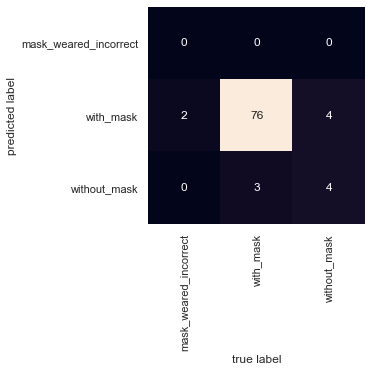

In [15]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names_list,
            yticklabels=target_names_list)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [16]:
import pickle

with open("face_mask_detect_model.pkl","wb") as file:
    pickle.dump(model, file, -1)

In [7]:
import pickle
import traceback
import numpy as np
model = ""
with open("face_mask_detect_model.pkl", "rb") as f:
    model = pickle.load(f)
from facenet_pytorch import MTCNN
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

detector = MTCNN(device='cuda')
import cv2

cam = cv2.VideoCapture(1)

cv2.namedWindow("test")

while True:
    ret, frame = cam.read()
    cv2.imshow("test",frame)
    if not ret:
        print("failed to grab frame")
        break
    ind_result = detector.detect(frame)
    try:
        for box in ind_result[0]:
            setRect = False
            box = np.array(box).astype('uint32')
            face = cv2.resize(frame[box[0]:box[2],box[1]:box[3]],(224,224))
            try:
                x=(model.predict(np.expand_dims(face.ravel(),axis=0)))
                setRect = True
                if x==2:
                    cv2.rectangle(frame,(box[0], box[1]),(box[2], box[3]),(0,0,255),2)
                elif x==1:
                    cv2.rectangle(frame,(box[0], box[1]),(box[2], box[3]),(0,255,0),2)
                else:
                    setRect = False
            except:
                pass
            if not setRect:
                cv2.rectangle(frame,(box[0], box[1]),(box[2], box[3]),(0,155,255),2)
    except:
        cv2.imshow("test",frame)
        continue
    cv2.imshow("test",frame)
    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break

cam.release()

cv2.destroyAllWindows()


Escape hit, closing...
